# Handling unstructured Data
Unstructured data is information that either does not have a pre-defined data model or is not organized in a pre-defined manner. Unstructured information is typically text-heavy, but may contain data such as dates, numbers, and facts as well. 

### Text Analysis using NLP Aproach
Natural language processing (NLP) is an area of computer science and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data. 

It is the branch of machine learning which is about analyzing any text and handling predictive analysis

#### Simple steps involved to impliment NLP
NLP algorithims can be used to construct text classifiers, like cartegorize book title, song title or movie titles into collect genre. 

In our case we shall classify customers review after attentinng our restaurant into positive or negative. The objective is to understand customers take for our services and meals.

we impliment this using the following simple steps

#### 1: Loading the dataset

In [1]:
cd C:\TUSHIAZ\Tutorials\Machine Learning\P14-Natural-Language-Processing

C:\TUSHIAZ\Tutorials\Machine Learning\P14-Natural-Language-Processing


In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# We load tab separated dataset(tsv) by specifying the delimiter to '\t'
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

In [4]:
## Reviewing the dataset
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


Note,
- We have two columns.
- One contains the reviews of each customers , using the natural english
- The second columns containes binary values clasifying the revies as positve (1) or negative (2)
- Our goal is to explore the comments and create a model that will predict any future review as either positive or negative

In [5]:
# Information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
Review    1000 non-null object
Liked     1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [6]:
### Dataset Shape
dataset.shape

(1000, 2)

## Step 2 Data cleaning and Preprocesing 
This is equivalent to data wrangling techniques in quantitative analysis. 

It involves the following steps in NLP:
- Remove Punctuations, Numbers 
- Stemming: Take roots of the word -like , *loving, lovely loverble, loved the root is* **love** 
- Convert each word into its lower case

Lets impliment this in codes now .. 😊

In [7]:
# library to clean text data 
import re  
  
# Natural Language Tool Kit 
import nltk  
  
nltk.download('stopwords') 
  
# to remove stopword 
from nltk.corpus import stopwords 
  
# for Stemming propose  
from nltk.stem.porter import PorterStemmer

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


Notes:
 -  **A stop word** is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore.
 - **Stemming** is the process of reducing inflection in words to their root forms
 
 
 We can clean the reviews, we shall clean the first review then loop through the dataset and clean all the other reviews.
 

In [8]:
## The first review we chall clean
dataset['Review'][0]

'Wow... Loved this place.'

In [9]:
## Creating the review object to hold our review
## Here, we remove everything except leter a-z,A-Z and add space to where we remove characters
review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][0]) 

review

'Wow    Loved this place '

In [10]:
### Converting all the characters to lowercase
review = review.lower()
review

'wow    loved this place '

In [11]:
### Splitting the review into different single words words
review=review.split()
review

['wow', 'loved', 'this', 'place']

In [12]:
## Stemming and removing stopwords
ps=PorterStemmer()
review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]

review

['wow', 'love', 'place']

Note we have removed the word **'This'** , and *stemmed* the word loved to **love**

In [13]:
## Rejoining all the elements back to a string
review=' '.join(review)
review

'wow love place'

##### Loping through the dataset and cleaning all the reviews

In [14]:
# Initialize empty array 
corpus = []  

# 1000 (reviews) rows to clean 
for i in range(0, 1000):  
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])  
    review = review.lower()  
    review = review.split()  
    ps = PorterStemmer()      
    review = [ps.stem(word) for word in review 
                if not word in set(stopwords.words('english'))]  
    review = ' '.join(review)   
      
    corpus.append(review)

After cleaning the data.....

In [15]:
corpus

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

### Step 3: Tokenization, 
This involves splitting sentences and words from the body of the text

### Step 4: Making the bag of words via sparse matrix

- Take all the different words of reviews in the dataset without repeating of words.
- One column for each word, therefore there are going to be many columns.
- Rows are reviews
- If word is there in row of dataset of reviews, then the count of word will be there in row of bag of words under the column of the word

In [16]:
# Creating the Bag of Words model 
from sklearn.feature_extraction.text import CountVectorizer 

# To extract max 1500 feature. 
cv = CountVectorizer(max_features = 1500) 
# X contains corpus (dependent variable) 
X = cv.fit_transform(corpus).toarray() #we vectorize the reviews

# y contains answers if review is positive or negative , (target variable)
y = dataset.iloc[:, 1].values 


In [17]:
pd.DataFrame(X).tail(3)

,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Step 5 : Splitting Corpus into Training and Test set.
We split the dataset in ratio $75/25$ *train/test* datasets

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 

### Step 6: Fitting a Predictive Model (here Random Forest)
- Since Random fored is ensemble model (made of many trees) from sklearn.ensemble, import RandomForestClassifier class *Randam forest classifier builds multiple decision trees and assings a value to the class that wins the majority vote*
- With 501 tree or “n_estimators” and criterion as ‘entropy’
- Fit the model via .fit() method with attributes X_train and y_train

In [19]:
from sklearn.ensemble import RandomForestClassifier 
  
# n_estimators can be said as number of trees, experiment with n_estimators to get better results  
model = RandomForestClassifier(n_estimators = 501, 
                            criterion = 'entropy') 
                              
model.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=501,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Step 7: Pridicting Final Results via using

In [20]:
y_pred = model.predict(X_test) 
  
y_pred 

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [21]:
y_test

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [22]:
## Model Accuracy
from sklearn.metrics import accuracy_score,confusion_matrix

accuracy_score(y_test, y_pred)

0.752

the model is $74\%$ accurate

In [23]:
confusion_matrix(y_test, y_pred)

array([[105,  26],
       [ 36,  83]], dtype=int64)

# EDA

In [24]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk import sent_tokenize,word_tokenize

from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words


tags_lower=dataset['Review'].str.lower().str.cat(sep=' ')## convert into lower case
tag_rm_punct=re.sub('[^A-Za-z]+',' ',tags_lower)## remove punctuation marks

stop_words=list(get_stop_words('en'))
nltk_words=list(stopwords.words('english'))
stop_words.extend(nltk_words)

word_tokens_tag=word_tokenize(tag_rm_punct)
filtered_sent_tags=[w_tags for w_tags in word_tokens_tag if not w_tags in stop_words]
# Remove characters which have length less than 2  
without_single_chr_tags=[word_tags for word_tags in filtered_sent_tags if len(word_tags)>2]

## Remove numbers
cleaned_data_tags=[word_tags for word_tags in without_single_chr_tags
                  if not word_tags.isnumeric()]

In [25]:
word_dist_tags=nltk.FreqDist(cleaned_data_tags)
rslt_tags=pd.DataFrame(word_dist_tags.most_common(50),columns=['Top_Words','Frequency'])

In [26]:
rslt_tags.head(15)

,Top_Words,Frequency
0,food,126
1,place,106
2,good,95
3,service,85
4,great,70
5,back,61
6,like,46
7,time,42
8,really,36
9,best,30


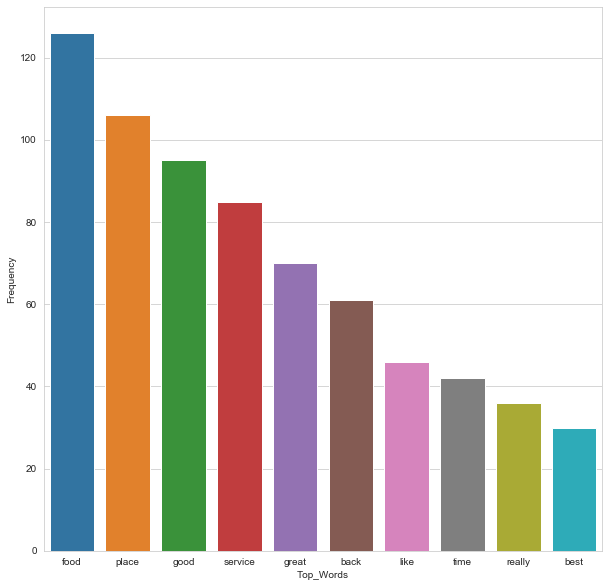

In [30]:
import seaborn as sns 

plt.figure(figsize=(10,10))
sns.set_style('whitegrid')
ax=sns.barplot(x='Top_Words',y='Frequency',data=rslt_tags.head(10))

In [28]:
def wc(data,bgcolor,title):
    plt.figure(figsize=(8,8))
    wc=WordCloud(background_color=bgcolor,max_words=100)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

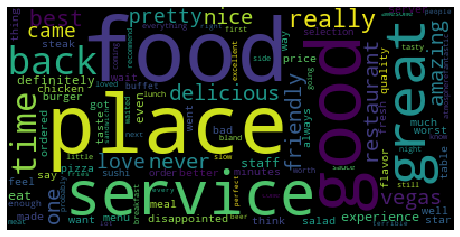

In [29]:
wc(cleaned_data_tags,'black','Top 100 Words')